Hi Semih,

I changed to a different dataset that's more aligned with the assignment.

I was using a 2015 Diabetes Health Indicators Dataset <u>cleaned</u> 253k dataset with 22 features<br/>
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv

<h5>I switched to a 2022 <u>uncleaned</u> 445k dataset with 326 features.</h5>
2022 BRFSS Survey Data and Documentation
https://www.cdc.gov/brfss/annual_data/annual_2022.html

Data codebook : https://www.cdc.gov/brfss/annual_data/2022/zip/codebook22_llcp-v2-508.zip

Data dictionary from: https://www.cdc.gov/brfss/annual_data/2022/files/LLCP2022XPT.zip


The Behavioral Risk Factor Surveillance System (BRFSS) is a collaborative project between all the states
in the United States and participating US territories and the Centers for Disease Control and Prevention
(CDC). The BRFSS is administered and supported by CDC's Population Health Surveillance Branch, under
the Division of Population Health at CDC’s National Center for Chronic Disease Prevention and Health
Promotion. The BRFSS is a system of ongoing health-related telephone surveys that collect data on
health-related risk behaviors, chronic health conditions, health-care access, and use of preventive
services from the noninstitutionalized adult population (≥ 18 years) residing in the United States and
participating areas.

This the original dataset contained 6 labels for Diabetes, these were grouped into 3 No Diabetes, Pre-Diabetes, and Diabetes.

The 445k original data was cleaned to 305k of data.

<i>What kind of cleaning steps did you perform?</i>
* Identify the features that would be useful.
* Reformat the identifiers to be sequential.
* Create new categories based on the input data.
* Convert the data to the new categories.
* Drop or convert null/empty/missing data based on the feature.

<i>How did you deal with missing values, if any?</i><br />
I made new categories, if the missing data fit into a new category it was moved.<br />
In some cases the mean was used if missing data wasn't available, depending on the data.<br />
Finally data was dropped if it didn't fit or wasn't suitable for conversion.
<br /><br />
<i>Were there outliers? If so, how did you handle them?</i><br />
Most of the numerical data was already in some type of bucket, in some cases I reduced the number of buckets by condensing.<br />
<br />
<i>If your dataset is too large to work with, does it make sense to build your prototype on a smaller subset of the data?</i><br />
Although I didn't reduce the data, if the data was too large a smaller subset work to build a prototype.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
raw_df = pd.read_sas(r"..\LLCP2022.XPT.zip")

In [37]:
raw_df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,1.0,b'02042022',b'02',b'04',b'2022',1100.0,b'2022000002',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000003',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000004',2.022000e+09,1.0,...,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000005',2.022000e+09,1.0,...,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,78.0,11.0,b'12192022',b'12',b'19',b'2022',1100.0,b'2022001527',2.022002e+09,NaN,...,4.0,NaN,7.0,9.000000e+02,9.0,9.990000e+04,9.0,NaN,NaN,1.0
445128,78.0,11.0,b'12212022',b'12',b'21',b'2022',1100.0,b'2022001528',2.022002e+09,NaN,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,1.0
445129,78.0,11.0,b'11292022',b'11',b'29',b'2022',1100.0,b'2022001529',2.022002e+09,NaN,...,1.0,NaN,7.0,9.000000e+02,9.0,9.990000e+04,9.0,2.0,2.0,2.0
445130,78.0,11.0,b'12082022',b'12',b'08',b'2022',1100.0,b'2022001530',2.022002e+09,NaN,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0


Selecting relevant features to report on.

In [ ]:
df = pd.DataFrame()

df['diabetes'] = raw_df.DIABETE4
# 1	Yes
# 2	Yes, but female told only during pregnancy
# 3	No
# 4	No, pre-diabetes or borderline diabetes
# 7	Don’t know/Not Sure
# 9	Refused—Go to Section
# BLANK	Not asked or Missing


df['completed_survey'] = raw_df.DISPCODE
# 1100	Completed Interview	
# 1200	Partial Complete Interview

df['bmi'] = raw_df._BMI5CAT
# 1	Underweight
# 2	Normal Weight
# 3	Overweight
# 4	Obese
# BLANK	Don’t know/Refused/Missing

df['smoker'] = raw_df._SMOKGRP
# 1	Current smoker, 20+ Pack Years
# 2	Former smoker, 20+ Pack Years, quit < 15 years
# 3	All other current and former smokers
# 4	Never smoker
# BLANK	Don’t know/Refused/Missing

df['stroke'] = raw_df.CVDSTRK3
# 1	Yes
# 2	No
# 7	Don’t know/Not sure
# 9	Refused
# BLANK	Not asked or Missing

df['heart_attack'] = raw_df.CVDINFR4
# # 1	Yes	
# 2	No
# 7	Don’t know/Not sure	
# 9	Refused	
# BLANK	Not asked or Missing

df['angina_or_chd'] = raw_df.CVDCRHD4
# 1	Yes
# 2	No
# 7	Don’t know/Not sure
# 9	Refused
# BLANK	Not asked or Missing

df['chd_mi'] = raw_df._MICHD
# 1	Reported having MI or CHD
# 2	Did not report having MI or CHD
# BLANK	Not asked or Missing.

df['asthma'] = raw_df._ASTHMS1
# 1	Current
# 2	Former
# 3	Never
# 9	Don’t know/Not Sure Or Refused/Missing
# Notes: ASTHMA3 = 7 or 9 or Missing or ASTHNOW = 7 or 9 or Missing

df['physical_activity'] = raw_df._TOTINDA
# 1	Had physical activity or exercise
# 2	No physical activity or exercise in last 30 days
# 9	Don’t know/Refused/Missing

df['heavy_drinking'] = raw_df._RFDRHV8
# 1	No
# 2	Yes
# 9	Don’t know/Refused/Missing

df['no_doctor_due_to_cost'] = raw_df.MEDCOST1
# 1	Yes
# 2	No
# 7	Don’t know/Not sure
# 9	Refused
# BLANK	Not asked or Missing

df['any_healthcare_insurance'] = raw_df.PRIMINSR
# 1	A plan purchased through an employer or union (including plans purchased through another person´s employer)
# 2	A private nongovernmental plan that you or another family member buys on your own
# 3	Medicare
# 4	Medigap
# 5	Medicaid
# 6	Children´s Health Insurance Program (CHIP)
# 7	Military related health care: TRICARE (CHAMPUS) / VA health care / CHAMP- VA
# 8	Indian Health Service
# 9	State sponsored health plan
# 10 Other government program
# 88 No coverage of any type
# 77 Don’t know/Not Sure
# 99 Refused
# BLANK	Not asked or Missing

df['general_health_status'] = raw_df.GENHLTH
# 1	Excellent
# 2	Very good
# 3	Good	
# 4	Fair
# 5	Poor
# 7	Don’t know/Not Sure
# 9	Refused
# BLANK	Not asked or Missing

df['mental_health_status'] = raw_df._MENT14D
# 1	Zero days when mental health not good
# 2	1-13 days when mental health not good
# 3	14+ days when mental health not good
# 9	Don’t know/Refused/Missing

df['physical_health_status'] = raw_df._PHYS14D
# 1	Zero days when physical health not good	
# 2	1-13 days when physical health not good
# 3	14+ days when physical health not good
# 9	Don’t know/Refused/Missing


df['difficulty_walking'] = raw_df.DIFFWALK
# 1	Yes	
# 2	No	
# 7	Don’t know/Not Sure
# 9	Refused	
# BLANK	Not asked or Missing

df['gender'] = raw_df._SEX
# 1	Male
# 2	Female

df['age'] = raw_df._AGEG5YR
# 1	Age 18 to 24
# 2	Age 25 to 29
# 3	Age 30 to 34
# 4	Age 35 to 39
# 5	Age 40 to 44
# 6	Age 45 to 49
# 7	Age 50 to 54
# 8	Age 55 to 59
# 9	Age 60 to 64
# 10 Age 65 to 69
# 11 Age 70 to 74
# 12 Age 75 to 79
# 13 Age 80 or older
# 14 Don’t know/Refused/Missing

df['education'] = raw_df._EDUCAG
# 1	Did not graduate High School
# 2	Graduated High School
# 3	Attended College or Technical School
# 4	Graduated from College or Technical School
# 9	Don’t know/Not sure/Missing

df['income'] = raw_df._INCOMG1
# 1	Less than $15,000
# 2	$15,000 to < $25,000
# 3	$25,000 to < $35,000
# 4	$35,000 to < $50,000
# 5	$50,000 to < $100,000
# 6	$100,000 to < $200,000
# 7	$200,000 or more
# 9	Don’t know/Not sure/Missing

df['race'] = raw_df._PRACE2
# 1	White
# 2	Black or African American
# 3	American Indian or Alaskan Native
# 4	Asian
# 5	Native Hawaiian or other Pacific Islander
# 7	Multiracial but no preferred race
# 88	No race choice given
# 77	Don’t know/Not sure
# 99	Refused
# BLANK	Missing

df['sleep_time'] = raw_df.SLEPTIM1
# 1 - 24	Number of hours [1-24]
# 77	Don’t know/Not Sure
# 99	Refused
# BLANK	Missing

df['years_smoked'] = raw_df.COPDSMOK
# 1 - 76	Number of years
# 88	Never smoked or smoked < one year
# 77	Don´t know/Not sure
# 99	Refused
# BLANK	Not asked or Missing


View the data

In [ ]:
df

,diabetes,completed_survey,bmi,smoker,stroke,heart_attack,angina_or_chd,chd_mi,asthma,physical_activity,...,mental_health_status,physical_health_status,difficulty_walking,gender,age,education,income,race,sleep_time,years_smoked
0,1.0,1100.0,NaN,4.0,2.0,2.0,2.0,2.0,3.0,2.0,...,1.0,1.0,2.0,2.0,13.0,4.0,9.0,1.0,8.0,NaN
1,3.0,1100.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,...,1.0,1.0,2.0,2.0,13.0,2.0,3.0,1.0,6.0,NaN
2,3.0,1100.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,...,2.0,2.0,2.0,2.0,8.0,4.0,6.0,1.0,5.0,NaN
3,3.0,1100.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,2.0,2.0,14.0,2.0,9.0,1.0,7.0,NaN
4,3.0,1100.0,2.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,...,1.0,2.0,2.0,2.0,5.0,3.0,3.0,1.0,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,3.0,1100.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,6.0,NaN
445128,3.0,1100.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,...,2.0,2.0,2.0,2.0,7.0,4.0,5.0,2.0,7.0,NaN
445129,3.0,1100.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,...,3.0,3.0,2.0,2.0,10.0,2.0,9.0,99.0,5.0,NaN
445130,3.0,1100.0,4.0,4.0,2.0,1.0,2.0,1.0,2.0,2.0,...,1.0,1.0,2.0,1.0,11.0,3.0,5.0,2.0,5.0,NaN


In [ ]:
#Check our missing data from which columns and how many unique features they have. 
pd.concat([df.isnull().sum(), df.nunique(), df.dtypes], axis = 1, sort= False, keys=['Null','Unique','Data Type'])

,Null,Unique,Data Type
diabetes,3,6,float64
completed_survey,0,2,float64
bmi,48806,4,float64
smoker,35462,4,float64
stroke,2,4,float64
heart_attack,4,4,float64
angina_or_chd,2,4,float64
chd_mi,5021,2,float64
asthma,0,4,float64
physical_activity,0,3,float64


Investigate each row

These have a Feature number and feature, followed by the original categories, and then the new format is listed, followed by validation.

In some cases Na/Nulls are going to be used, so NA drop is at the end after the conversion to the new categorical format.

In [ ]:
#1 - diabetes
# 1	Yes
# 2	Yes, but female told only during pregnancy—Go to Section 08.01 AGE
# 3	No—Go to Section 08.01 AGE
# 4	No, pre-diabetes or borderline diabetes—Go to Section 08.01 AGE
# 7	Don’t know/Not Sure—Go to Section 08.01 AGE
# 9	Refused—Go to Section 08.01 AGE
# BLANK	Not asked or Missing	

#Remove refused
df.drop(df[df.diabetes == 9.0].index, inplace=True)

#Update to new layout
#During pregnancy to 0
#No to 0
#Yes to 2
#Pre to 1
#Don't no to 0
#refused to 0
df.diabetes = df.diabetes.replace({2:0, 3:0, 1:2, 4:1, 7:0, 9:0})

#New layout
# 0 - None
# 1 - Diabetes
# 2 - Pre-Diabetes

#Validate
df.groupby(df.diabetes, dropna=False, as_index=False).size()

,diabetes,size
0,0.0,373321
1,1.0,10329
2,2.0,61158
3,NaN,3


In [ ]:
#2 completed_survey
# Drop incomplete surveys
df.drop(df[df.completed_survey == '1200'].index, inplace=True)

#Drop the completed_survey column
df.drop(["completed_survey"], axis=1, inplace=True)

In [147]:
#3 bmi

# 1	Underweight
# 2	Normal Weight
# 3	Overweight
# 4	Obese
# BLANK	Don’t know/Refused/Missing

# 1	Underweight
# 2	Normal Weight
# 3	Overweight
# 4	Obese

#Drop Unknown
df.drop(df[df.bmi.isnull()].index, inplace=True)

#Validate
df.groupby(df.bmi, dropna=False, as_index=False).size()

,bmi,size
0,1.0,6777
1,2.0,116951
2,3.0,139964
3,4.0,132551


In [148]:
# 4 smoker
# Value	Value Label	Frequency	Percentage	Weighted Percentage
# 1	Current smoker, 20+ Pack Years
# 2	Former smoker, 20+ Pack Years, quit < 15 years
# 3	All other current and former smokers
# 4	Never smoker
# BLANK	Don’t know/Refused/Missing

#Don’t know/Refused/Missing to probably smoked
df.loc[df.smoker.isnull(), "smoker"] = 3

#Move heavy current smoker to heavy former smoker
df.loc[df.smoker == 1, "smoker"] = 2

#Move Never smoked to 0
df.loc[df.smoker == 4, "smoker"] = 0

# 0 Never
# 1 Current 
# 2

#Validate
df.groupby(df.smoker, dropna=False, as_index=False).size()

,smoker,size
0,0.0,226695
1,2.0,34909
2,3.0,134639


In [149]:
#5 stroke
df.groupby(df.stroke, dropna=False, as_index=False).size()
# 1	Yes	
# 2	No	
# 7	Don’t know/Not sure	
# 9	Refused	

#No, Don't know, Refused to 0
df.stroke = df.stroke.replace({2:0, 7:0, 9:0})

#Validate
df.groupby(df.stroke, dropna=False, as_index=False).size()

,stroke,size
0,0.0,378635
1,1.0,17608


In [150]:
# 6 heart_attack
df.groupby(df.heart_attack, dropna=False, as_index=False).size()
# 1	Yes	
# 2	No
# 7	Don’t know/Not sure	
# 9	Refused	
# BLANK	Not asked or Missing

# heart_attack - #Change to binary
# No to 0
# Don't know to 0
# REfused to 0
df.heart_attack = df.heart_attack.replace({2:0, 7:0, 9:0})

#Validate
df.groupby(df.heart_attack, dropna=False, as_index=False).size()

,heart_attack,size
0,0.0,373207
1,1.0,23034
2,NaN,2


In [151]:
#7 angina_or_chd
# 1	Yes
# 2	No
# 7	Don’t know/Not sure
# 9	Refused
# BLANK	Not asked or Missing
# angina_or_chd - #Change to binary

#To binary
# No - 0
# Don't know/Not sure to 0
# Refused to 0
df.angina_or_chd = df.angina_or_chd.replace({2:0, 7:0, 9:0})

#Validate
df.groupby(df.angina_or_chd, dropna=False, as_index=False).size()

,angina_or_chd,size
0,0.0,371805
1,1.0,24438


In [152]:
#8 - chd_mi

# 1	Reported having MI or CHD
# 2	Did not report having MI or CHD
# BLANK	Not asked or Missing

#Change to binary
df.loc[df.chd_mi == 2, "chd_mi"] = 0

#Nulls to no
df.loc[df.chd_mi.isnull(), "chd_mi"] = 0

#Validate
df.groupby(df.chd_mi, dropna=False, as_index=False).size()

,chd_mi,size
0,0.0,359745
1,1.0,36498


In [153]:
# 9 asthma

# 1	Current
# 2	Former
# 3	Never
# 9	Don’t know/Not Sure Or Refused/Missing
# Notes: ASTHMA3 = 7 or 9 or Missing or ASTHNOW = 7 or 9 or Missing

# asthma - Change to binary
# former to 1
# Never to 0
# Don't know to 0
df.asthma = df.asthma.replace({2:1, 3:0, 9:0})

#Validate
df.groupby(df.asthma, dropna=False, as_index=False).size()

,asthma,size
0,0.0,338474
1,1.0,57769


In [154]:
# 10 physical_activity
# 1	Had physical activity or exercise
# 2	No physical activity or exercise in last 30 days
# 9	Don’t know/Refused/Missing


# To Binary
# No activity to 0
# Don't know to 0
df.physical_activity = df.physical_activity.replace({2:0, 9:0})

#Validate
df.groupby(df.physical_activity, dropna=False, as_index=False).size()

,physical_activity,size
0,0.0,93840
1,1.0,302403


In [155]:
#11 heavy_drinking

# 1	No
# 2	Yes
# 9	Don’t know/Refused/Missing

#To Binary
# No to 0
# Yes to 1
# Don't know to 0
df.heavy_drinking = df.heavy_drinking.replace({1:0, 2:1, 9:0})

#Validate
df.groupby(df.heavy_drinking, dropna=False, as_index=False).size()

,heavy_drinking,size
0,0.0,370953
1,1.0,25290


In [156]:
#12 no_doctor_due_to_cost
# 1	Yes
# 2	No
# 7	Don’t know/Not sure
# 9	Refused
# BLANK	Not asked or Missing

# 0 No
# 1 Yes
df.loc[df.no_doctor_due_to_cost.isin([2,7,9]), "no_doctor_due_to_cost"] = 0

#Validate
df.groupby(df.no_doctor_due_to_cost, dropna=False, as_index=False).size()


,no_doctor_due_to_cost,size
0,0.0,363715
1,1.0,32526
2,NaN,2


In [157]:
#13 any_healthcare_insurance
# 1	A plan purchased through an employer or union (including plans purchased through another person´s employer)
# 2	A private nongovernmental plan that you or another family member buys on your own
# 3	Medicare #
# 4	Medigap #
# 5	Medicaid #
# 6	Children´s Health Insurance Program (CHIP) #
# 7	Military related health care: TRICARE (CHAMPUS) / VA health care / CHAMP- VA #
# 8	Indian Health Service #
# 9	State sponsored health plan#
# 10	Other government program #
# 88	No coverage of any type #
# 77	Don’t know/Not Sure
# 99	Refused
# BLANK	Not asked or Missing


#0 - No Insurance
#1 - Commercial Insurance
#2 - Federal Insurance
#3 - State Insurance
#4 - Unknown Insurance

#No coverage to No Insurance
df.loc[df.any_healthcare_insurance.isin([88]), "any_healthcare_insurance"] = 0

# Commercial Insurance
# Add Private personal, Medigap, Indian
df.loc[df.any_healthcare_insurance.isin([2,4]), "any_healthcare_insurance"] = 1

# Federal Insurance
# Add Indian Health Service, CHIP, Medicare, Indian, Other government program
df.loc[df.any_healthcare_insurance.isin([3,6,7,8,10]), "any_healthcare_insurance"] = 2

# State Insurance
# Add Medicaid, state sponsored medical
df.loc[df.any_healthcare_insurance.isin([5,9]), "any_healthcare_insurance"] = 3

#>65 and don't know/refused. = Medicare
df.loc[(df.any_healthcare_insurance.isin([77,99])) & (df.age.isin([10,11,12,13])), "any_healthcare_insurance"] = 2

#Unknown Insurance
df.loc[df.any_healthcare_insurance.isin([77,99]), "any_healthcare_insurance"] = 4

#Validate
df.groupby(df.any_healthcare_insurance, dropna=False, as_index=False).size()    

,any_healthcare_insurance,size
0,0.0,19258
1,1.0,177577
2,2.0,153264
3,3.0,37196
4,4.0,8946
5,NaN,2


In [158]:
# 13 general_health_status
# 1	Excellent
# 2	Very good
# 3	Good	
# 4	Fair
# 5	Poor
# 7	Don’t know/Not Sure
# 9	Refused
# BLANK	Not asked or Missing

#Remove don't know, refused
df.drop(df[df.general_health_status.isin([7,9,np.nan])].index, inplace=True)

# 1	Excellent
# 2	Very good
# 3	Good	
# 4	Fair
# 5	Poor

#Validate
df.groupby(df.general_health_status, dropna=False, as_index=False).size()

,general_health_status,size
0,1.0,63820
1,2.0,133571
2,3.0,126585
3,4.0,53655
4,5.0,17728


In [159]:
# 14 mental_health_status
# 1	Zero days when mental health not good
# 2	1-13 days when mental health not good
# 3	14+ days when mental health not good
# 9	Don’t know/Refused/Missing


# 1-13 days when mental health not good to 1 
# 14+ days when mental health not good to 2

# Drop Don’t know/Refused/Missing
df.drop(df[df.mental_health_status.isin([9])].index, inplace=True)

#Reindex
df.loc[df.mental_health_status.isin([1]), "mental_health_status"] = 0
df.loc[df.mental_health_status.isin([2]), "mental_health_status"] = 1
df.loc[df.mental_health_status.isin([3]), "mental_health_status"] = 2

#Validate
df.groupby(df.mental_health_status, dropna=False, as_index=False).size()

,mental_health_status,size
0,0.0,234329
1,1.0,99790
2,2.0,54048


In [160]:
# 15 physical_health_status

# 1	Zero days when physical health not good	
# 2	1-13 days when physical health not good
# 3	14+ days when physical health not good
# 9	Don’t know/Refused/Missing

# Drop Don’t know/Refused/Missing
df.drop(df[df.physical_health_status.isin([9])].index, inplace=True)

# Reindex
df.loc[df.physical_health_status.isin([1]), "physical_health_status"] = 0
df.loc[df.physical_health_status.isin([2]), "physical_health_status"] = 1
df.loc[df.physical_health_status.isin([3]), "physical_health_status"] = 2

#Validate
df.groupby(df.physical_health_status, dropna=False, as_index=False).size()

,physical_health_status,size
0,0.0,234486
1,1.0,96198
2,2.0,50806


In [161]:
# 16 difficulty_walking 
           
# 1	    Yes	                    
# 2	    No	                    
# 7	    Don’t know/Not Sure	    
# 9	    Refused	                
# BLANK	Not asked or Missing

# Drop Don't know/Not Sure/Refused
df.drop(df[df.difficulty_walking.isin([7,9])].index, inplace=True)

#Nulls to No Difficulty
df.loc[df.difficulty_walking.isnull(), "difficulty_walking"] = 2.0 # No

#Change to binary
df.loc[df.difficulty_walking == 1, "difficulty_walking"] = 1
df.loc[df.difficulty_walking == 2, "difficulty_walking"] = 0

#validate
df.groupby(df.difficulty_walking, dropna=False, as_index=False).size()

,difficulty_walking,size
0,0.0,322037
1,1.0,58383


In [162]:
#17 gender

#female to 0
df.loc[df.gender.isin([2]), "gender"] = 0

#validate
df.groupby(df.gender, dropna=False, as_index=False).size()

,gender,size
0,0.0,194213
1,1.0,186207


In [163]:
#18 age
# 1	Age 18 to 24
# 2	Age 25 to 29
# 3	Age 30 to 34
# 4	Age 35 to 39
# 5	Age 40 to 44
# 6	Age 45 to 49
# 7	Age 50 to 54
# 8	Age 55 to 59
# 9	Age 60 to 64
# 10 Age 65 to 69
# 11 Age 70 to 74
# 12 Age 75 to 79
# 13 Age 80 or older
# 14 Don’t know/Refused/Missing

# 1 18 - 29
# 2 30 - 39
# 3 40 - 49
# 4 50 - 59
# 5 60 - 69
# 6 70 - 79
# 7 80 + 

#Drop Don't know/Refused/Missing
df.drop(df[df.age.isin([14])].index, inplace=True)

#Group by decade
df.loc[df.age.isin([2]), "age"] = 1
df.loc[df.age.isin([3,4]), "age"] = 2
df.loc[df.age.isin([5,6]), "age"] = 3
df.loc[df.age.isin([7,8]), "age"] = 4
df.loc[df.age.isin([9,10]), "age"] = 5
df.loc[df.age.isin([11,12]), "age"] = 6
df.loc[df.age.isin([13]), "age"] = 7

#validate
df.groupby(df.age, dropna=False, as_index=False).size()

,age,size
0,1.0,41849
1,2.0,46076
2,3.0,50542
3,4.0,61103
4,5.0,79729
5,6.0,66204
6,7.0,30647


In [164]:
#19 education
# 1	Did not graduate High School
# 2	Graduated High School
# 3	Attended College or Technical School
# 4	Graduated from College or Technical School
# 9	Don’t know/Not sure/Missing

# 1	Did not graduate High School
# 2	Graduated High School
# 3	Attended College or Technical School
# 4	Graduated from College or Technical School

#Drop Don't know
df.drop(df[df.education.isin([9])].index, inplace=True)

#validate
df.groupby(df.education, dropna=False, as_index=False).size()

,education,size
0,1.0,19683
1,2.0,90887
2,3.0,102772
3,4.0,162073


In [165]:
# 20 income
# 1	Less than $15,000
# 2	$15,000 to < $25,000
# 3	$25,000 to < $35,000
# 4	$35,000 to < $50,000
# 5	$50,000 to < $100,000
# 6	$100,000 to < $200,000
# 7	$200,000 or more
# 9	Don’t know/Not sure/Missing

# Drop Don't know/Not sure/Missing
df.drop(df[df.income.isin([9])].index, inplace=True)

# 0	Don’t know/Not sure/Missing
# 1	Less than $15,000
# 2	$15,000 to < $25,000
# 3	$25,000 to < $35,000
# 4	$35,000 to < $50,000
# 5	$50,000 to < $100,000
# 6	$100,000 to < $200,000
# 7	$200,000 or more

#validate
df.groupby(df.income, dropna=False, as_index=False).size()

,income,size
0,1.0,18244
1,2.0,30264
2,3.0,37314
3,4.0,41983
4,5.0,98651
5,6.0,67573
6,7.0,21981


In [166]:
#21 race
# 1	White
# 2	Black or African American
# 3	American Indian or Alaskan Native
# 4	Asian
# 5	Native Hawaiian or other Pacific Islander
# 7	Multiracial but no preferred race
# 88	No race choice given
# 77	Don’t know/Not sure
# 99	Refused
# BLANK	Missing


# 1	White
# 2	Black or African American
# 3	American Indian or Alaskan Native
# 4	Asian
# 5	Native Hawaiian or other Pacific Islander
# 6	No preferred race

# 7	Multiracial but no preferred race
# 88	No race choice given

# 77	Don’t know/Not sure
# 99	Refused
# BLANK	Missing
# (Above) -> No preferred race

#Drop Do'nt know, Refused,no race, null
df.drop(df[df.race.isin([77,88,99,np.nan])].index, inplace=True)

#Align index
df.loc[df.race.isin([7]), "race"] = 6

#validate
df.groupby(df.race, dropna=False, as_index=False).size()

,race,size
0,1.0,255119
1,2.0,28633
2,3.0,7254
3,4.0,10171
4,5.0,3054
5,6.0,1119


In [167]:
#22 sleep_time
# 1 - 24	Number of hours [1-24]
# 77	Don’t know/Not Sure
# 99	Refused
# BLANK	Missing

# Set Don't know/Refused/Null to the mean.
df.loc[df.sleep_time.isin([77,99,np.nan]), "sleep_time"] = df.loc[df.sleep_time<25].sleep_time.mean().round()

#validate
df.groupby(df.sleep_time, dropna=False, as_index=False).size()

,sleep_time,size
0,1.0,693
1,2.0,940
2,3.0,2103
3,4.0,8232
4,5.0,20657
5,6.0,67330
6,7.0,96605
7,8.0,84277
8,9.0,14550
9,10.0,6727


In [168]:
# 23 years_smoked
df.groupby(df.years_smoked, dropna=False, as_index=False).size()

#set years_smoked to 0 if never smoked.
df.loc[df.years_smoked.isnull(), "years_smoked"] = 0

#validate
df.groupby(df.years_smoked, dropna=False, as_index=False).size()

,years_smoked,size
0,0.0,300228
1,1.0,83
2,2.0,83
3,3.0,64
4,4.0,65
...,...,...
68,75.0,1
69,76.0,2
70,77.0,120
71,88.0,2893


In [169]:
#Check our missing data from which columns and how many unique features they have. 
pd.concat([df.isnull().sum(), df.nunique(), df.dtypes], axis = 1, sort= False, keys=['Null','Unique','Data Type'])

,Null,Unique,Data Type
diabetes,0,3,float64
bmi,0,4,float64
smoker,0,3,float64
stroke,0,2,float64
heart_attack,2,2,float64
angina_or_chd,0,2,float64
chd_mi,0,2,float64
asthma,0,2,float64
physical_activity,0,2,float64
heavy_drinking,0,2,float64


Remove Nulls after conversion

In [170]:

#data with nulls remaining
print(f"Nulls remaining {df.isnull().sum().sum()}")

#remove nulls
df.dropna(inplace=True)

#Validate
print(f"Nulls remaining {df.isnull().sum().sum()}")

Nulls remaining 5
Nulls remaining 0


The dataframe is composed of indexing information, if necessary a list of columns can be passed in to create a value based dataframe.

In [238]:
def get_data_for_report(columns):
    data_df = pd.DataFrame()
    
    for column in columns:
        data_df[column] = df[column]
        
        match column:
            case "diabetes":
                data_df[column] = df[column].replace({0:'None', 1:'Diabetes', 2:'Pre-Diabetes'})
            case "bmi":
                data_df[column] = df[column].replace({1:'Under', 2:'Normal', 3:'Over', 4:'Obese'})
            case "smoker":
                data_df[column] = df[column].replace({0:'Never', 1:'Current', 2:'Heavy'})
            case "stroke":
                data_df[column] = df[column].replace({0:'No', 1:'Yes'})
            case "heart_attack":
                data_df[column] = df[column].replace({0:'No', 1:'Yes'})
            case "angina_or_chd":
                data_df[column] = df[column].replace({0:'No', 1:'Yes'})
            case "chd_mi":
                data_df[column] = df[column].replace({0:'No', 1:'Yes'})
            case "asthma":
                data_df[column] = df[column].replace({0:'No', 1:'Yes'})
            case "physical_activity":
                data_df[column] = df[column].replace({0:'No', 1:'Yes'})               
            case "heavy_drinking":
                data_df[column] = df[column].replace({0:'No', 1:'Yes'})    
            case "no_doctor_due_to_cost":
                data_df[column] = df[column].replace({0:'No', 1:'Yes'})    
            case "any_healthcare_insurance":            
                data_df[column] = df[column].replace({0:'No', 1:'Commercial', 2:'Federal', 3:'State', 4:'Unknown'})                                  
            case "general_health_status":            
                data_df[column] = df[column].replace({1:'Excellent', 2:'Very Good', 3:'Good', 4:'Fair', 5:'Poor'})                   
            case "mental_health_status":            
                data_df[column] = df[column].replace({0:'None', 1:'Sometimes', 2:'Mostly'})                   
            case "physical_health_status":            
                data_df[column] = df[column].replace({0:'None', 1:'Sometimes', 2:'Mostly'})                   
            case "difficulty_walking":
                data_df[column] = df[column].replace({0:'No', 1:'Yes'})   
            case "gender":
                data_df[column] = df[column].replace({0:'Female', 1:'Male'})   
            case "age":            
                data_df[column] = df[column].replace({ 1:'18 - 29', 2:'30 - 39', 3:'40 - 49', 4:'50 - 59', 5:'60 - 69', 6:'70 - 79', 7:'80 +'})                   
            case "education":            
                data_df[column] = df[column].replace({ 1:'No High School', 2:'Graduated High School', 3:'Some College', 4:'Graduated College'})                                   
            case "income":            
                data_df[column] = df[column].replace({ 1:'Under $15k', 2:'$25k to $35k', 3:'35k to $50k', 4:'50k to 100k', 5:'100k to 200k', 6:'Over 200k'})                   
            case "race":            
                data_df[column] = df[column].replace({1:"White", 2:'Black or African American', 3:'American Indian or Alaskan Native', 4:'Asian', 5:'Native Hawaiian or other Pacific Islander', 6: 'No Specific Race'})                   
            case "sleep_time":                            
                data_df[column] = df[column] #Numerical
            case "years_smoked":            
                data_df[column] = df[column] #Numerical                  
            case _:
                print(f"Can't find: {column}")
        
    return data_df

When we want to report on a feature, we can pass in the column to retrieve label information on the values in a feature.

This is also used for sorting.

In [239]:
def column_order(column):
    
    match column:
        case "diabetes":
            return ['None', 'Pre-Diabetes', 'Diabetes']
        case "bmi":
            return ['Under', 'Normal', 'Over', 'Obese']
        case "smoker":
            return ['Never', 'Current', 'Heavy']
        case "stroke":
            return ['No', 'Yes']
        case "heart_attack":
            return ['No', 'Yes']
        case "angina_or_chd":
            return ['No', 'Yes']
        case "chd_mi":
            return ['No', 'Yes']
        case "asthma":
            return ['No', 'Yes']
        case "physical_activity":
            return ['No', 'Yes']
        case "heavy_drinking":
            return ['No', 'Yes']
        case "no_doctor_due_to_cost":
            return ['No', 'Yes']
        case "any_healthcare_insurance":            
            return ['No', 'Commercial', 'Federal', 'State','Unknown']
        case "general_health_status":            
            return ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
        case "mental_health_status":            
            return ['None', 'Sometimes', 'Mostly']
        case "physical_health_status":            
            return ['None', 'Sometimes', 'Mostly']
        case "difficulty_walking":
            return ['No', 'Yes']
        case "gender":
            return ['Female', 'Male']            
        case "age":            
            return ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 +'] 
        case "education":            
            return ['No High School', 'Graduated High School', 'Some College', 'Graduated College']
        case "income":            
            return ['Under $15k', '$15,000 to < $25,000', '$25k to $35k', '35k to $50k', '50k to 100k', '100k to 200k', 'Over 200k']
        case "race":            
            return ["White", 'Black or African American', 'American Indian or Alaskan Native', 'Asian', 'Native Hawaiian or other Pacific Islander', 'No Specific Race']
        case 'sleep_time':
            return sorted(df.sleep_time.unique())
    return [f"Can't find {column}"]

In [174]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diabetes,305345.0,0.295322,0.693579,0.0,0.0,0.0,0.0,2.0
bmi,305345.0,3.030326,0.829846,1.0,2.0,3.0,4.0,4.0
smoker,305345.0,1.198241,1.405342,0.0,0.0,0.0,3.0,3.0
stroke,305345.0,0.042192,0.201026,0.0,0.0,0.0,0.0,1.0
heart_attack,305345.0,0.056356,0.230608,0.0,0.0,0.0,0.0,1.0
angina_or_chd,305345.0,0.060689,0.238759,0.0,0.0,0.0,0.0,1.0
chd_mi,305345.0,0.089554,0.285543,0.0,0.0,0.0,0.0,1.0
asthma,305345.0,0.147410,0.354515,0.0,0.0,0.0,0.0,1.0
physical_activity,305345.0,0.775120,0.417504,0.0,1.0,1.0,1.0,1.0
heavy_drinking,305345.0,0.068529,0.252652,0.0,0.0,0.0,0.0,1.0


Data Visualization


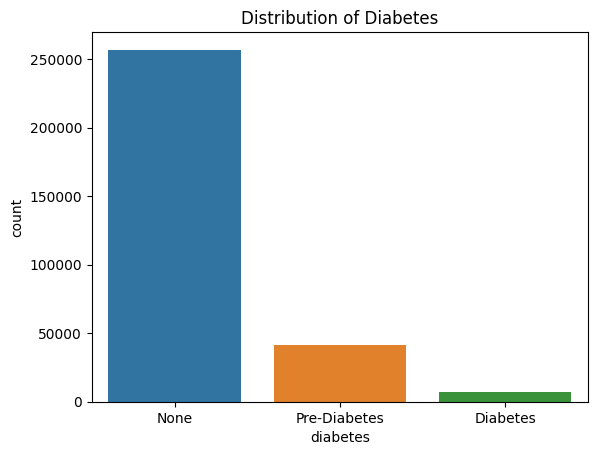

In [265]:
sns.countplot(x='diabetes', data=report_df)
plt.title('Distribution')
plt.show()

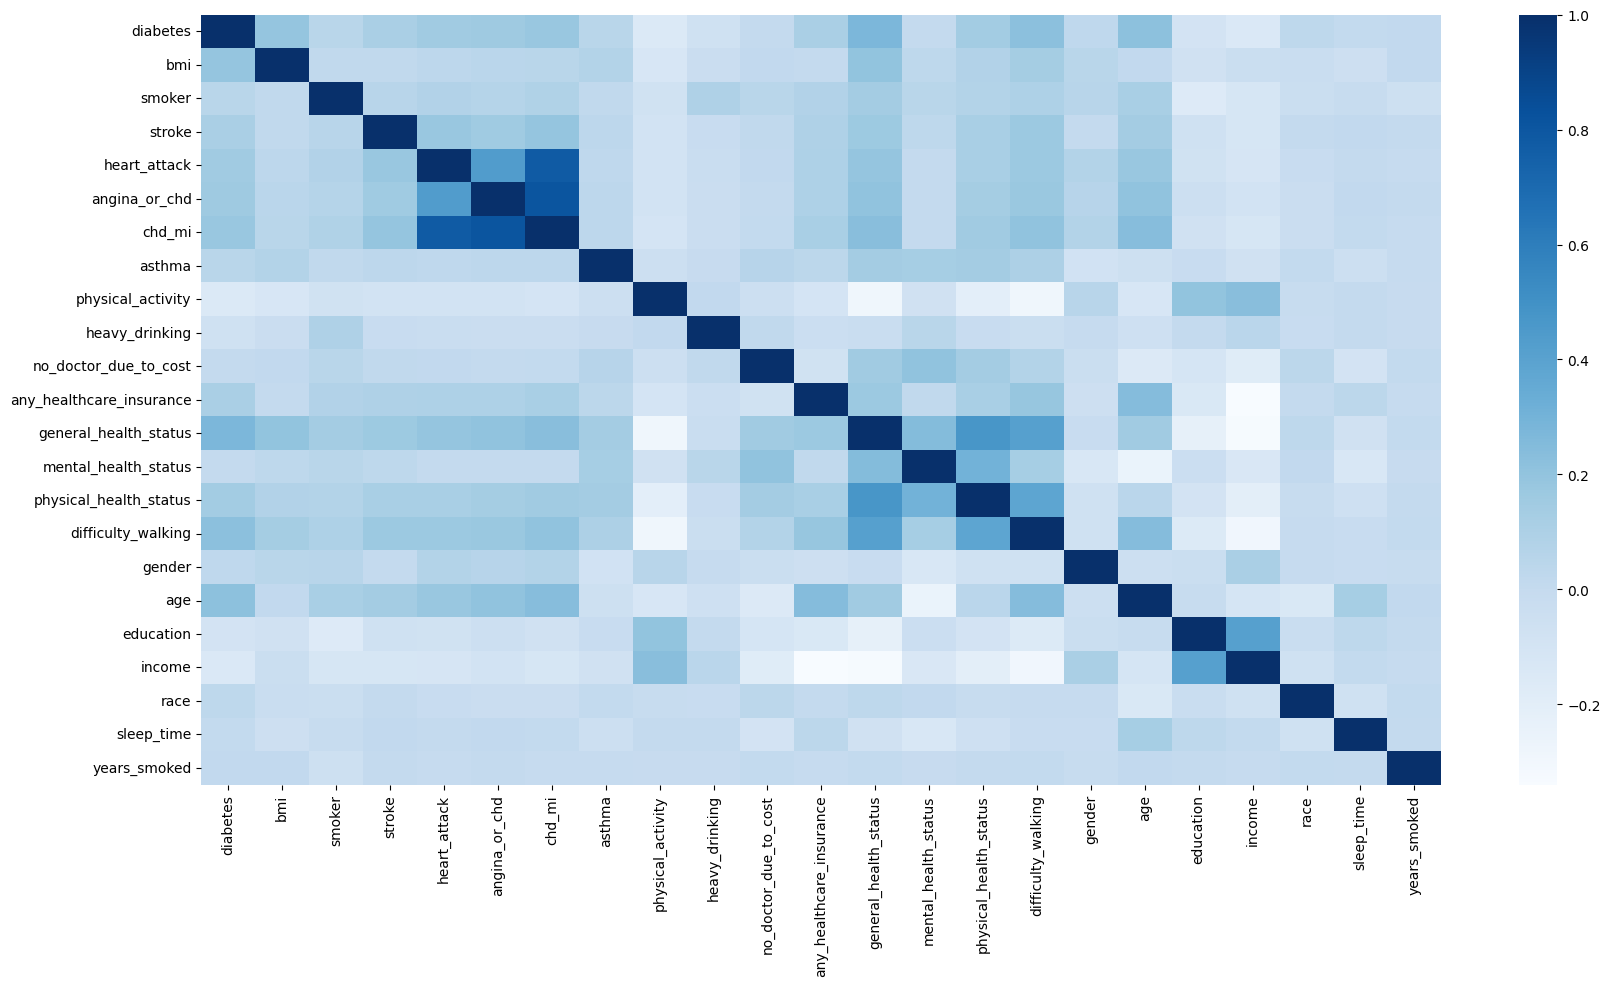

In [176]:
corr_matrix = df.corr()
plt.figure(figsize=(20,10), dpi=100)
sns.heatmap(corr_matrix ,cmap='Blues')
plt.show()

In [177]:
df.corr()['diabetes'].sort_values()

physical_activity          -0.149226
income                     -0.146195
education                  -0.093547
heavy_drinking             -0.063648
no_doctor_due_to_cost       0.001626
mental_health_status        0.004955
sleep_time                  0.007292
years_smoked                0.012210
gender                      0.023837
race                        0.028660
asthma                      0.049471
smoker                      0.050606
stroke                      0.112849
any_healthcare_insurance    0.114399
physical_health_status      0.144710
heart_attack                0.150888
angina_or_chd               0.159329
chd_mi                      0.181181
bmi                         0.192417
age                         0.219628
difficulty_walking          0.221370
general_health_status       0.275806
diabetes                    1.000000
Name: diabetes, dtype: float64

Identify potential significant factors.

<Axes: >

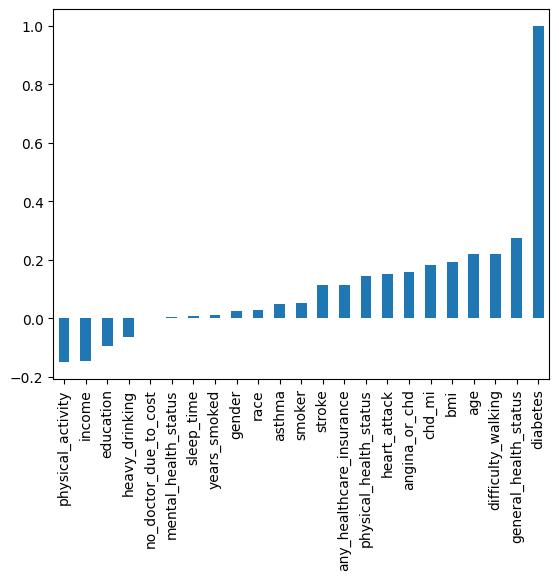

In [178]:
df.corr()['diabetes'].sort_values().plot(kind='bar')

Categorical

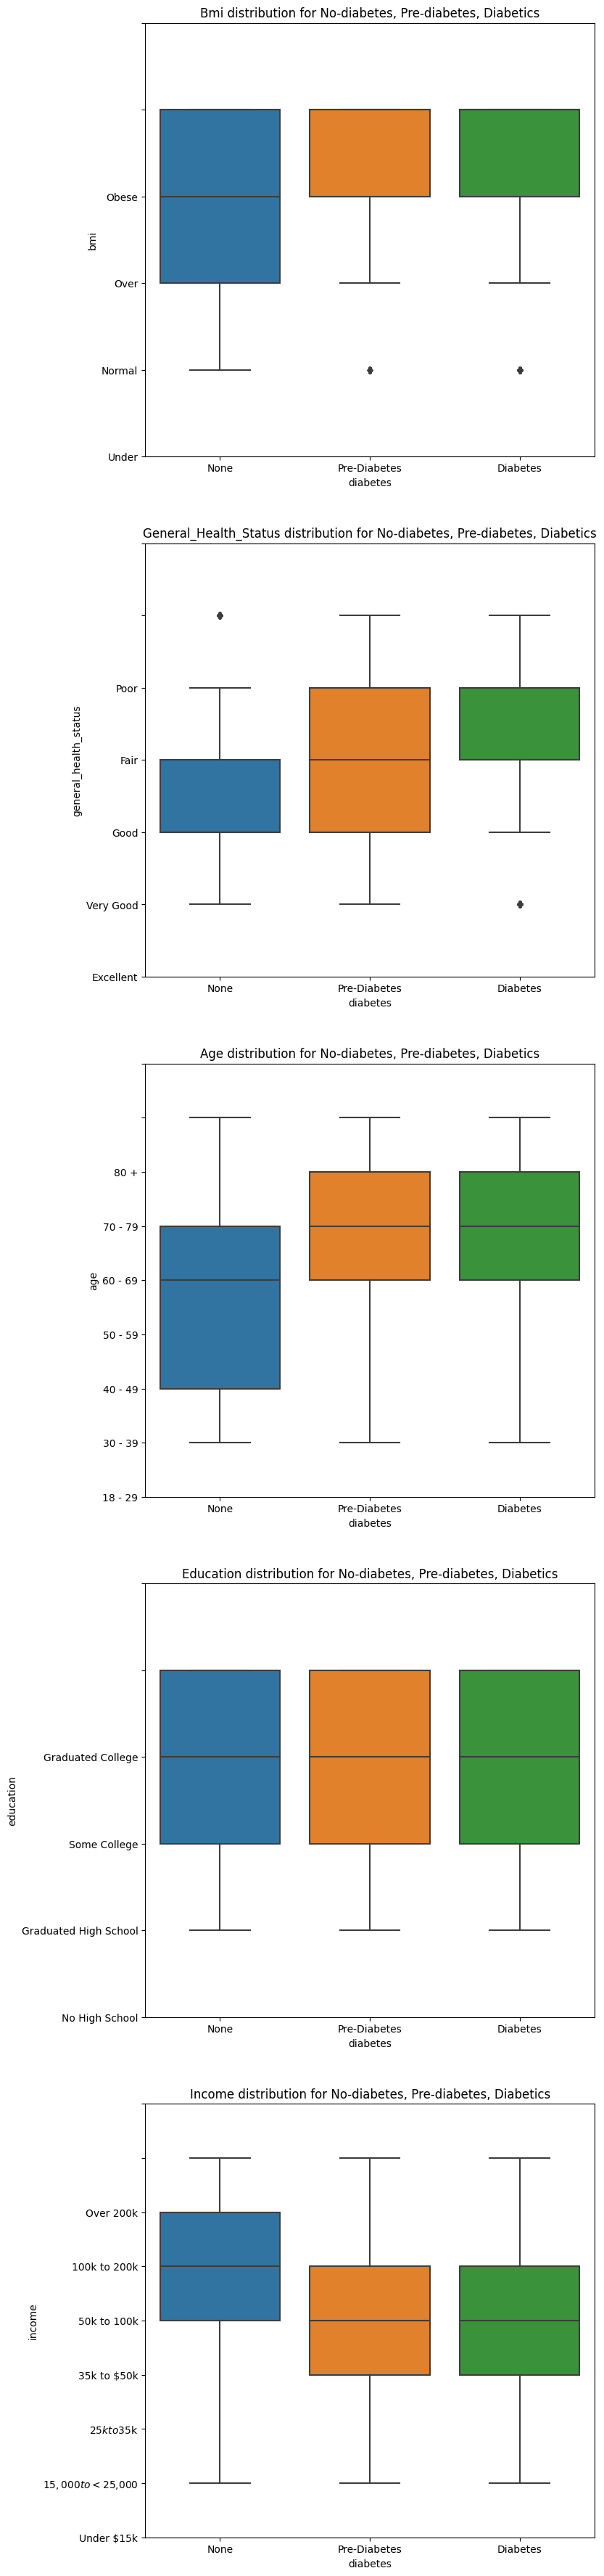

In [279]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

categorical_columns = ['bmi','general_health_status','age','education','income']

fig = plt.figure(figsize=(8,45))
counter = 1
for column in categorical_columns:
    plt.subplot(len(categorical_columns),1,counter)
    
    ax = sns.boxplot(data=df, x='diabetes', y=column)
    ax.set(title = f'{column.title()} distribution for No-diabetes, Pre-diabetes, Diabetics')
    ax.set_xticklabels(column_order('diabetes'))
    ax.set_yticklabels(column_order(column))
    plt.ylim(0,len(df[column].unique())+1)
    counter = counter + 1

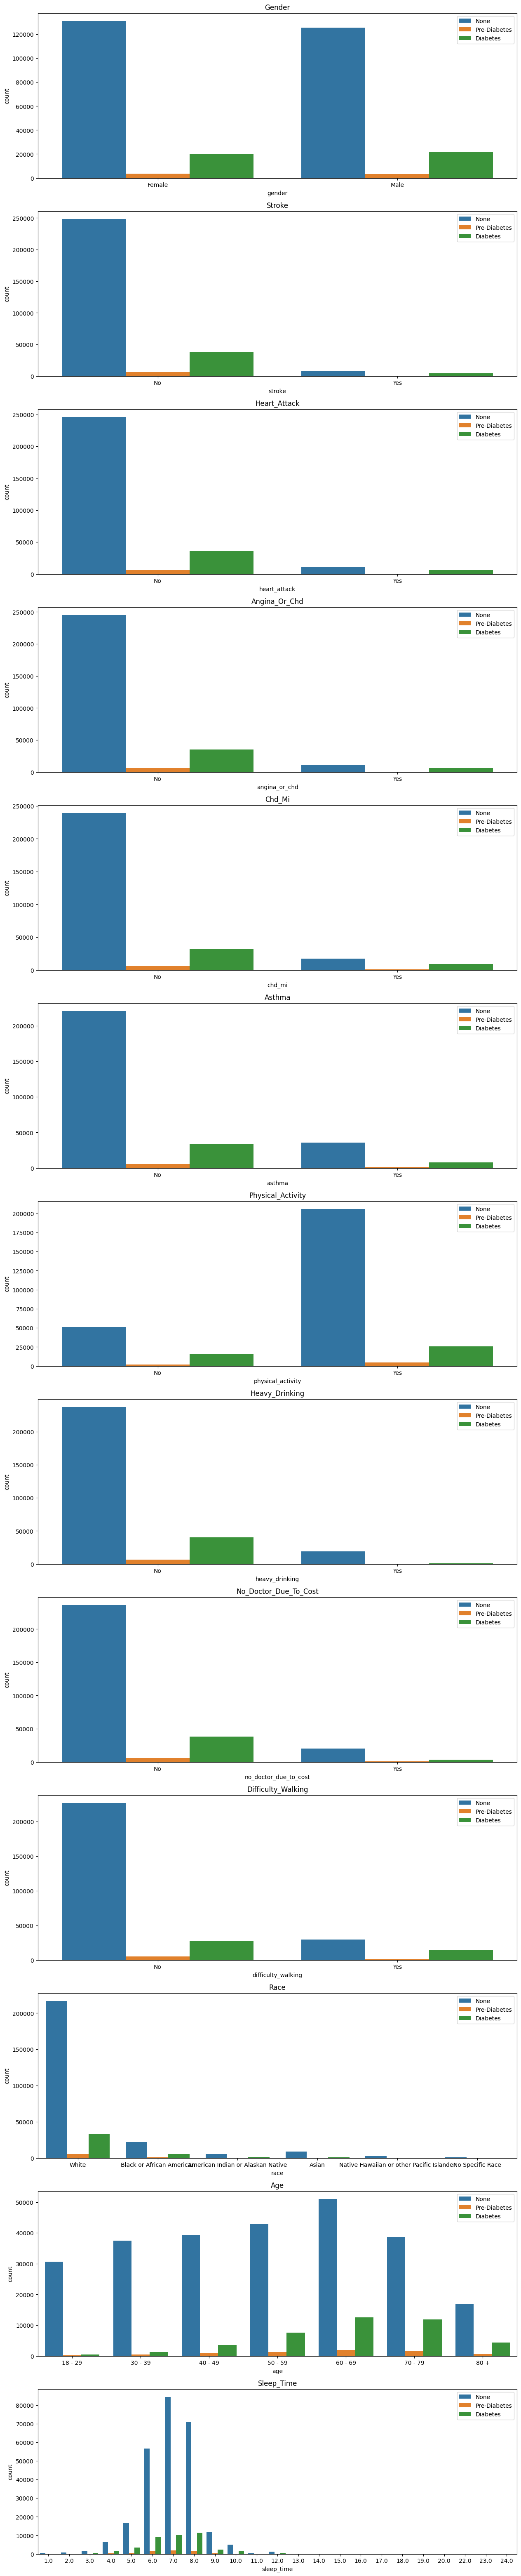

In [280]:
binary_columns = ["gender",
                  "stroke", 
                  "heart_attack", 
                  "angina_or_chd", 
                  "chd_mi", 
                  "asthma", 
                  "physical_activity", 
                  "heavy_drinking", 
                  "no_doctor_due_to_cost", 
                  "difficulty_walking",
                  "race",
                  "age",
                  "sleep_time"]

fig = plt.figure(figsize=(15,80))
counter = 1
for column in binary_columns:
    plt.subplot(len(binary_columns),1,counter)
    ax = sns.countplot(data=df, x=column,  hue='diabetes')
    ax.set(title = column.title())
    ax.legend(column_order('diabetes'))
    ax.set_xticklabels(column_order(column))
    counter=counter + 1
